In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Having a Look at the data

salaries_df = pd.read_csv('ds_salaries.csv')
salaries_df.head()

In [21]:
salaries_df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [23]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


## Data Cleaning

In [5]:
salaries_df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [36]:
# Checking for duplicates
salaries_df.loc[salaries_df.duplicated()]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size


In [35]:
# Removing duplicated rows from the dataset
salaries_df.loc[~salaries_df.duplicated(subset=['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'])]


In [40]:
# Dropping the salary and salary_currency columns since they have been summarized to the salary_in_usd
salaries_df.drop(['salary', 'salary_currency'], axis=1, inplace=True)

Now that the data is clean now, We'll proceed to Exploratory Data Analysis to see how the data is
## Exploratory Data Analysis

In [41]:
salaries_df.head(10)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,US,0,US,M


In [42]:
salaries_df.describe()

,work_year,salary_in_usd,remote_ratio
count,2584.000000,2584.000000,2584.000000
mean,2022.301084,133409.280186,50.483746
std,0.749179,67136.837329,48.163707
min,2020.000000,5132.000000,0.000000
25%,2022.000000,84975.000000,0.000000
50%,2022.000000,130000.000000,50.000000
75%,2023.000000,175000.000000,100.000000
max,2023.000000,450000.000000,100.000000


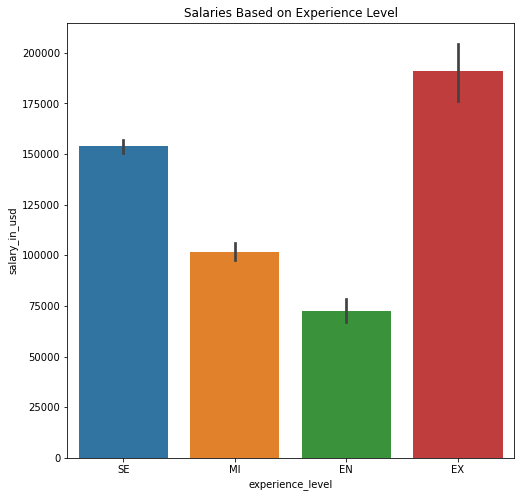

In [54]:
fig, ax = plt.subplots(figsize =(8,8))
sns.barplot(x = 'experience_level', y = 'salary_in_usd', data = salaries_df).set_title('Salaries Based on Experience Level')
plt.show()